In [1]:
import pandas as pd
from analysis import load_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Loading data...
Loaded data successfully
   item_id                          name  units               added  user_id
0      135     Goldfinch steilhead cider    3.0 2025-08-29 19:36:21       10
1      136    Bulmers Red Berries & Lime    2.0 2025-08-31 15:24:47        7
2      201  Death By Cherries Fruit Sour    2.0 2025-09-26 18:16:08        7
   user_id      username             created
0        1          moir 2025-07-16 18:30:34
1        2  adamwooooood 2025-07-16 18:33:35
2        3     tester555 2025-07-16 18:34:56
   consumption_id  item_id  user_id                time  price
0               4       33        5 2025-07-16 19:00:19    NaN
1               5       46        6 2025-07-17 20:46:57    NaN
2               6       59        5 2025-07-20 21:28:06    NaN


## Loading Data

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
items, users, consumptions = load_data()

In [4]:
df_merged = pd.merge(consumptions, items,suffixes=['_con','_items'], on = 'item_id')
df_merged = df_merged.rename(columns={'user_id_con':'user_id'})
df_merged.drop(['user_id_items','added'], axis = 1,inplace=True)
df_merged = pd.merge(df_merged, users[['username','user_id']], suffixes = ['_con','_user'], on = 'user_id')
df_merged.drop(['item_id','user_id'], axis = 1,inplace=True)
df_merged = df_merged.iloc[:,[0,5,3,4,1,2]]
df_merged

,consumption_id,username,name,units,time,price
0,4,lewisclp,Hopo,3.1,2025-07-16 19:00:19,NaN
1,5,Euan,Tennents Pint,2.3,2025-07-17 20:46:57,NaN
2,6,lewisclp,Salt Rock Brewing Drangonfly Amber Ale,2.1,2025-07-20 21:28:06,NaN
3,7,lewisclp,Loch Ness Brewery Light Ness,1.9,2025-07-21 21:01:57,NaN
4,8,lewisclp,Craingorm Trade Winds Bottle,2.2,2025-07-21 21:41:40,NaN
...,...,...,...,...,...,...
750,762,lewisclp,Joker IPA Pint,2.8,2025-10-24 18:06:29,NaN
751,763,lewisclp,Williams Bros Craft Lager,1.8,2025-10-24 19:12:02,NaN
752,764,lewisclp,Joker IPA Pint,2.8,2025-10-24 19:12:20,NaN
753,765,lewisclp,Williams Bros Craft Lager,1.8,2025-10-24 20:09:51,NaN


## Individual Analysis

In [5]:
df_named = df_merged[df_merged['username'] == 'lewisclp'].reset_index(drop=True)

In [6]:
df_named.head()

,consumption_id,username,name,units,time,price
0,4,lewisclp,Hopo,3.1,2025-07-16 19:00:19,NaN
1,6,lewisclp,Salt Rock Brewing Drangonfly Amber Ale,2.1,2025-07-20 21:28:06,NaN
2,7,lewisclp,Loch Ness Brewery Light Ness,1.9,2025-07-21 21:01:57,NaN
3,8,lewisclp,Craingorm Trade Winds Bottle,2.2,2025-07-21 21:41:40,NaN
4,9,lewisclp,Tennents Pint,2.3,2025-07-22 20:07:41,NaN


In [7]:
df_group_named=df_named[['consumption_id','name']].groupby('name').count().sort_values(by='consumption_id', ascending = False)

In [8]:
cut_off = df_group_named.iloc[0:20]

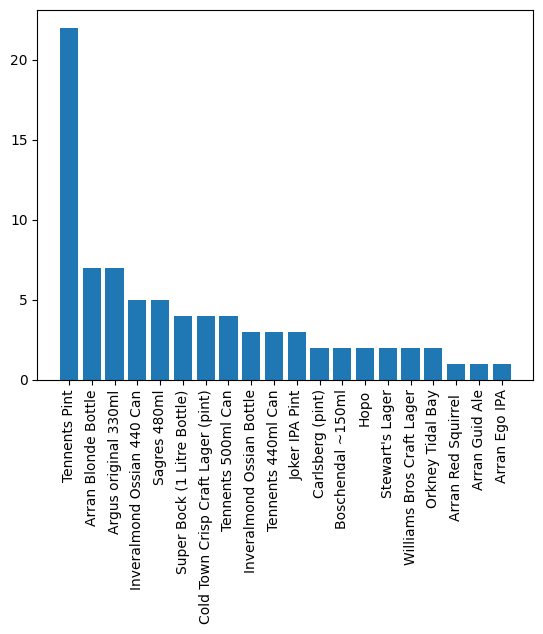

In [9]:
fig, ax = plt.subplots()
beer = cut_off.index.tolist()
ax.bar(beer,cut_off['consumption_id'])
ax.set_xticks(beer,beer,rotation=90)
plt.show()

## Time Series Analysis

In [10]:
df_time = df_merged.copy()

In [11]:
df_time['date'] = df_time['time'].dt.date
df_time.drop(columns=['time'])

,consumption_id,username,name,units,price,date
0,4,lewisclp,Hopo,3.1,NaN,2025-07-16
1,5,Euan,Tennents Pint,2.3,NaN,2025-07-17
2,6,lewisclp,Salt Rock Brewing Drangonfly Amber Ale,2.1,NaN,2025-07-20
3,7,lewisclp,Loch Ness Brewery Light Ness,1.9,NaN,2025-07-21
4,8,lewisclp,Craingorm Trade Winds Bottle,2.2,NaN,2025-07-21
...,...,...,...,...,...,...
750,762,lewisclp,Joker IPA Pint,2.8,NaN,2025-10-24
751,763,lewisclp,Williams Bros Craft Lager,1.8,NaN,2025-10-24
752,764,lewisclp,Joker IPA Pint,2.8,NaN,2025-10-24
753,765,lewisclp,Williams Bros Craft Lager,1.8,NaN,2025-10-24


In [12]:
df_date_group = df_time[['consumption_id','date']].groupby('date').count()

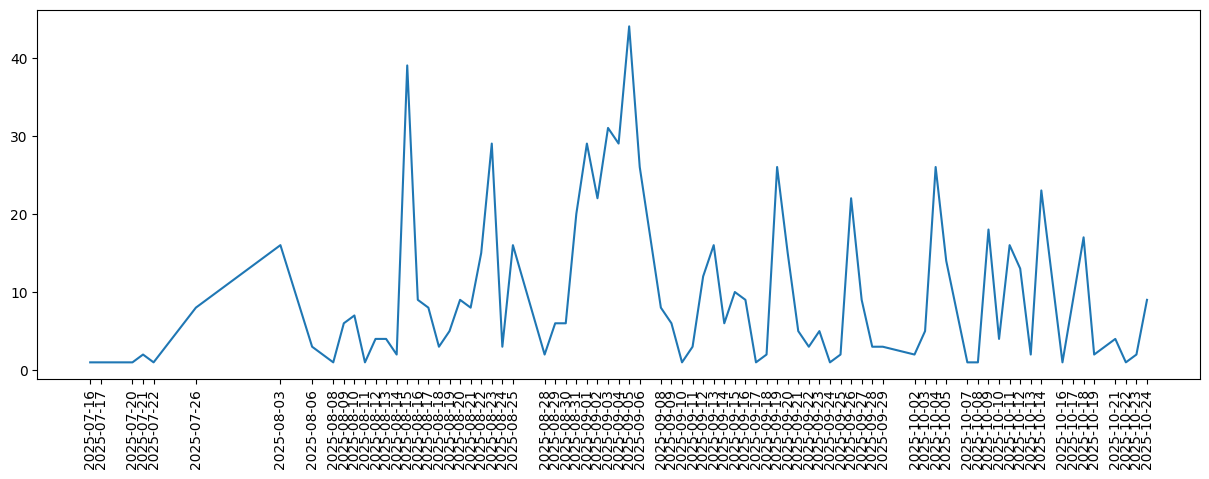

In [13]:
fig, ax = plt.subplots()

dates = df_date_group.index.tolist()
ax.plot(dates,df_date_group['consumption_id'])
ax.set_xticks(dates,dates,rotation=90)
fig.set_figwidth(15)

plt.show()